<span style="font-size: 250%"> Partie 2 : Nettoyages et analyse </span>

# Importation les librairies

In [1]:
import pandas as pd # (version pandas 1.4.2)
import numpy as np  # (version numpy 1.22.4)
import seaborn as sns # (version seaborn 0.11.2)
import scipy.stats as st
import datetime 
sns.set_palette("colorblind")

import matplotlib.pyplot as plt
import plotly.graph_objects as go
#import lux

from scipy.stats import shapiro

from fonction import detection_outliers_interquantile
from fonction import testerCle
from fonction import moving_average

colors = ["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0"]

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

# Importation les données

In [2]:
df_final = pd.read_csv('df_final.csv') 

#  Nettoyage et analyse univarié et bi varié et observer les distributions et les coéhences de chaques de variables

Unité est milliers de tonnes

In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Zone                                 154 non-null    object 
 1   Facilité de faire des affaires 2020  154 non-null    float64
 2   Population (2017)                    154 non-null    float64
 3   Evo 2015_2017 %                      154 non-null    float64
 4   Dispo intérieure poulet              154 non-null    float64
 5   Exportations poulet                  154 non-null    float64
 6   Importations poulet                  154 non-null    float64
 7   Production poulet                    154 non-null    float64
 8   Consommation poulet                  154 non-null    float64
 9   PIB (US$)                            154 non-null    float64
 10  Taux_import_poulet %                 154 non-null    float64
 11  Taux_export_poulet %            

In [4]:
df_final.describe()

,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
count,154.000000,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,62.628571,4.503270e+07,2.548052,729.246753,115.584416,97.266234,762.389610,699.025974,14358.343597,2.549351,0.511818,2.983961,1.684221,-0.074026,5.545130
std,16.172836,1.603948e+08,2.336559,2287.152759,482.865571,194.158854,2604.055508,2235.916396,19866.580816,3.776346,1.608447,2.500851,1.716134,0.920936,4.582071
min,0.000000,5.204500e+04,-2.900000,2.000000,0.000000,0.000000,0.000000,2.000000,450.900697,0.000000,0.000000,0.040000,0.030000,-2.940000,0.000000
25%,54.700000,2.926834e+06,0.850000,33.500000,0.000000,4.000000,14.250000,30.250000,2036.042229,0.332500,0.000000,1.242500,0.740000,-0.647500,1.480000
50%,63.450000,1.009671e+07,2.300000,110.500000,1.000000,20.500000,70.000000,103.000000,6111.503500,1.205000,0.005000,2.215000,1.130000,0.035000,3.915000
75%,74.475000,3.268696e+07,4.400000,374.250000,19.250000,95.000000,445.250000,378.500000,16775.324560,3.147500,0.587500,4.040000,2.050000,0.650000,9.045000
max,85.300000,1.421022e+09,9.300000,18266.000000,4223.000000,1069.000000,21914.000000,18100.000000,111017.182246,24.290000,18.370000,13.040000,9.200000,1.430000,18.690000


In [5]:
df_final.head()

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
0,Afghanistan,44.1,36296113.0,5.5,57.0,0.0,29.0,28.0,55.0,520.616409,0.64,0.00,0.42,0.38,-2.80,5.63
1,Afrique du Sud,67.0,57009756.0,2.9,2118.0,63.0,514.0,1667.0,2035.0,6121.876572,5.70,0.57,6.41,3.17,-0.28,4.40
2,Albanie,67.7,2884169.0,-0.2,47.0,0.0,38.0,13.0,47.0,4514.204908,4.30,0.00,1.29,0.96,0.38,1.10
3,Algérie,48.6,41389189.0,4.2,277.0,0.0,2.0,275.0,264.0,4109.696001,0.01,0.00,0.80,0.61,-0.92,10.16
4,Allemagne,79.7,82658409.0,1.1,1739.0,646.0,842.0,1514.0,1609.0,44651.829102,1.27,1.10,2.06,0.99,0.59,1.48


## Analyse sur la clé primaire

In [6]:
testerCle(df_final, ['Zone'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut être utilisée comme clé primaire.
Le dataframe est de la forme : (154, 16) (lignes, colonnes)


In [7]:
df_final['Zone'].nunique()

154

In [8]:
# Trouver le nombre de doublons
df_final.duplicated(['Zone']).sum()

0

## Analyse sur la variable afin de détecter des valeurs aberrantes

### Population

<AxesSubplot:xlabel='Zone', ylabel='Population (2017)'>

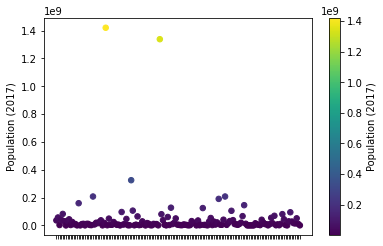

In [9]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Population (2017)', c = 'Population (2017)', s=30, cmap = 'viridis')

In [10]:
df_final_evo_p = df_final.loc[df_final['Population (2017)'] > 175000000 ]
df_final_evo_p

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
23,Brésil,59.1,2.078338e+08,1.6,9982.0,4223.0,3.0,14201.0,9982.0,9928.675992,0.02,2.74,6.23,0.92,-0.42,8.41
31,"Chine, continentale",78.2,1.421022e+09,1.0,18161.0,576.0,452.0,18236.0,17518.0,8663.126784,0.22,1.43,1.27,0.79,0.00,2.47
47,États-Unis d'Amérique,84.0,3.250848e+08,1.3,18266.0,3692.0,123.0,21914.0,18100.0,59921.674703,0.15,1.78,5.62,2.15,0.34,1.52
65,Inde,71.0,1.338677e+09,2.2,3661.0,4.0,0.0,3545.0,2965.0,1960.390340,0.00,0.01,0.42,0.31,-0.76,6.19
102,Nigéria,56.9,1.908732e+08,5.4,202.0,0.0,0.0,201.0,192.0,1968.687237,0.00,0.00,0.16,0.10,-2.00,12.37
106,Pakistan,61.0,2.079062e+08,4.3,1282.0,4.0,2.0,1281.0,1218.0,1455.991742,0.02,0.05,1.25,0.66,-2.41,8.67


### Evo 2015_2017 %

In [11]:
detection_outliers_interquantile(df_final,'Evo 2015_2017 %')

La valeur de Q1 pour le 'Evo 2015_2017 %' est de 0.850000.
La valeur de Q3 pour le 'Evo 2015_2017 %' est de 4.400000.
La valeur de l'IQR pour le 'Evo 2015_2017 %' est de 3.5500000000000003.
Les outliers sont : []
Dimensions du dataframe sans les outliers : (154, 16)
Le nombre de outliers est de : 0


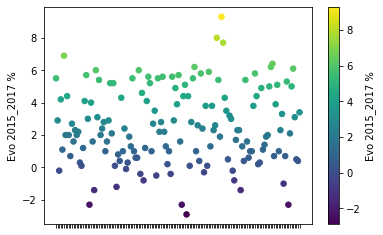

In [12]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Evo 2015_2017 %', c = 'Evo 2015_2017 %', s=30, cmap = 'viridis');

In [13]:
df_final_evo_g = df_final.loc[df_final['Evo 2015_2017 %'] > 6 ]
df_final_evo_g

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
5,Angola,41.3,29816766.0,6.9,319.0,0.0,277.0,42.0,315.0,4095.811686,6.67,0.00,1.85,0.99,-0.33,9.23
87,Mali,52.9,18512430.0,6.2,52.0,0.0,1.0,48.0,52.0,830.021400,0.07,0.00,0.45,0.29,-1.91,9.24
101,Niger,56.8,21602382.0,8.0,21.0,0.0,3.0,19.0,20.0,517.771881,0.26,0.00,0.18,0.14,-1.27,8.06
104,Oman,70.0,4665928.0,9.3,114.0,16.0,126.0,7.0,101.0,15130.543438,3.63,1.59,3.05,2.71,0.75,1.71
105,Ouganda,60.0,41166588.0,7.7,66.0,0.0,0.0,65.0,62.0,767.101705,0.00,0.00,0.28,0.22,-0.57,8.09
135,République-Unie de Tanzanie,54.5,54660339.0,6.2,108.0,0.0,2.0,105.0,103.0,1001.160919,0.12,0.00,0.32,0.25,-0.56,8.94
136,Tchad,36.9,15016753.0,6.4,7.0,0.0,1.0,6.0,7.0,692.161630,0.46,0.00,0.14,0.10,-1.29,16.36
149,Zambie,66.9,16853599.0,6.1,60.0,1.0,12.0,49.0,58.0,1534.874627,2.28,0.12,0.97,0.49,0.15,4.82


Il y a 10 pays le taux d'évolution de population entre 2015 et 2017 est plus grand que 6%, et 18 pays ont négatives.

In [14]:
df_final_evo_s = df_final.loc[df_final['Evo 2015_2017 %'] < 0 ]
df_final_evo_s

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
2,Albanie,67.7,2884169.0,-0.2,47.0,0.0,38.0,13.0,47.0,4514.204908,4.30,0.00,1.29,0.96,0.38,1.10
21,Bosnie-Herzégovine,65.4,3351525.0,-2.3,55.0,8.0,10.0,61.0,56.0,5394.741461,0.44,1.18,1.69,1.02,-0.35,2.86
24,Bulgarie,72.0,7102444.0,-1.4,157.0,45.0,108.0,107.0,157.0,8335.277986,3.40,0.53,3.04,1.51,0.33,1.48
38,Croatie,73.6,4182857.0,-1.2,45.0,17.0,24.0,61.0,45.0,13439.243178,0.88,0.68,1.06,0.58,0.69,1.48
44,Espagne,77.9,46647428.0,-0.1,1497.0,212.0,205.0,1515.0,1418.0,28137.441564,0.49,0.62,3.24,1.52,0.28,1.48
53,Géorgie,83.7,4008716.0,-0.4,61.0,5.0,51.0,22.0,61.0,4051.842804,3.46,1.23,2.51,1.99,-0.37,0.21
55,Grèce,68.4,10569450.0,-0.8,178.0,29.0,79.0,246.0,162.0,18907.740558,1.01,0.60,1.62,0.85,-0.07,1.48
63,Hongrie,73.4,9729823.0,-0.5,266.0,210.0,58.0,493.0,246.0,14711.084220,1.43,1.45,3.30,1.50,0.81,1.48
72,Japon,78.0,127502725.0,-0.4,2415.0,10.0,1069.0,2215.0,2359.0,38672.407740,2.13,0.59,3.20,2.21,1.11,2.22
79,Lettonie,80.3,1951097.0,-2.3,41.0,20.0,43.0,33.0,41.0,15623.931572,1.71,0.45,2.24,1.30,0.46,1.48


### PIB (US$)

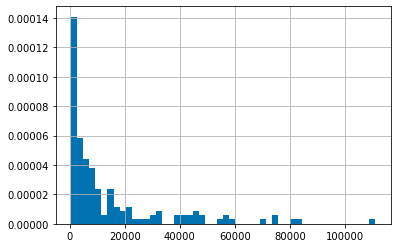

In [15]:
# Histogramme
df_final["PIB (US$)"].hist(density=True, bins=50)
plt.show()

In [16]:
df_final_pib = df_final.loc[df_final['PIB (US$)'] < 100 ]
df_final_pib

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane


In [17]:
df_final.at[34, 'PIB (US$)'] = 25061.62

In [18]:
detection_outliers_interquantile(df_final,'PIB (US$)')

La valeur de Q1 pour le 'PIB (US$)' est de 2036.042229.
La valeur de Q3 pour le 'PIB (US$)' est de 17260.600231.
La valeur de l'IQR pour le 'PIB (US$)' est de 15224.55800175.
Les outliers sont : [44651.829102, 57628.863849, 47309.051637, 44025.903247, 44906.74892, 57938.797728, 40644.804043, 59921.674703, 46385.550876, 70568.302444, 73949.769216, 111017.182246, 75220.814442, 48989.638816, 46705.027813, 40448.365256, 54621.345824, 83313.013992, 81043.968656]
Dimensions du dataframe sans les outliers : (135, 16)
Le nombre de outliers est de : 19


In [19]:
df_final_pib_ab = df_final.loc[df_final['PIB (US$)'] > 70000 ]
df_final_pib_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
68,Irlande,79.6,4753279.0,2.2,128.0,93.0,99.0,110.0,123.0,70568.302444,1.30,0.99,2.64,1.13,1.00,1.48
69,Islande,79.0,334393.0,1.3,10.0,0.0,2.0,10.0,10.0,73949.769216,0.68,0.00,3.10,1.86,1.35,1.53
83,Luxembourg,69.6,591910.0,4.4,11.0,1.0,11.0,0.0,11.0,111017.182246,1.29,0.14,1.88,1.44,1.33,1.48
103,Norvège,82.6,5296326.0,1.9,102.0,0.0,2.0,101.0,101.0,75220.814442,0.04,0.00,2.04,1.04,1.17,2.80
132,Suisse,76.6,8455804.0,1.9,133.0,4.0,51.0,91.0,133.0,83313.013992,1.02,0.20,1.69,1.03,1.26,1.36
153,Chine - RAS de Macao,0.0,622585.0,3.4,19.0,0.0,23.0,3.0,21.0,81043.968656,4.70,0.00,4.68,4.27,1.43,0.00


### Facilité de faire des affaires 2020

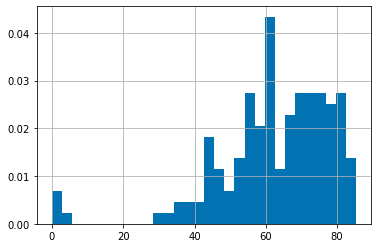

In [20]:
# Histogramme
df_final["Facilité de faire des affaires 2020"].hist(density=True, bins=30)
plt.show()

In [21]:
df_final_eco_ab = df_final.loc[df_final['Facilité de faire des affaires 2020'] < 5 ]
df_final_eco_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
37,Cuba,0.0,11339254.0,0.1,342.0,0.0,312.0,29.0,269.0,8541.214440,6.81,0.0,2.81,1.02,0.65,8.83
152,Tchéquie,0.0,10641034.0,0.4,249.0,27.0,116.0,163.0,234.0,20545.836143,1.81,0.3,2.53,1.21,1.00,1.48
153,Chine - RAS de Macao,0.0,622585.0,3.4,19.0,0.0,23.0,3.0,21.0,81043.968656,4.70,0.0,4.68,4.27,1.43,0.00


On va supprimer les données 0

In [22]:
df_final = df_final.loc[df_final['Facilité de faire des affaires 2020']>5]

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Zone                                 150 non-null    object 
 1   Facilité de faire des affaires 2020  150 non-null    float64
 2   Population (2017)                    150 non-null    float64
 3   Evo 2015_2017 %                      150 non-null    float64
 4   Dispo intérieure poulet              150 non-null    float64
 5   Exportations poulet                  150 non-null    float64
 6   Importations poulet                  150 non-null    float64
 7   Production poulet                    150 non-null    float64
 8   Consommation poulet                  150 non-null    float64
 9   PIB (US$)                            150 non-null    float64
 10  Taux_import_poulet %                 150 non-null    float64
 11  Taux_export_poulet %            

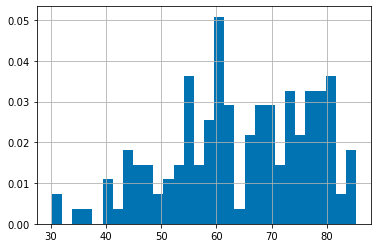

In [24]:
# Histogramme
df_final["Facilité de faire des affaires 2020"].hist(density=True, bins=30)
plt.show()

In [25]:
detection_outliers_interquantile(df_final,'Facilité de faire des affaires 2020')

La valeur de Q1 pour le 'Facilité de faire des affaires 2020' est de 55.350000.
La valeur de Q3 pour le 'Facilité de faire des affaires 2020' est de 74.875000.
La valeur de l'IQR pour le 'Facilité de faire des affaires 2020' est de 19.525000000000006.
Les outliers sont : []
Dimensions du dataframe sans les outliers : (150, 16)
Le nombre de outliers est de : 0


### Dispo intérieure poulet

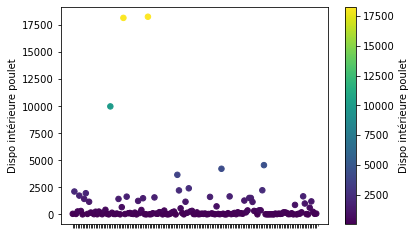

In [26]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Dispo intérieure poulet', c = 'Dispo intérieure poulet', s=30, cmap = 'viridis');

In [27]:
df_final_dispo_ab = df_final.loc[df_final['Dispo intérieure poulet'] > 7500 ]
df_final_dispo_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
23,Brésil,59.1,2.078338e+08,1.6,9982.0,4223.0,3.0,14201.0,9982.0,9928.675992,0.02,2.74,6.23,0.92,-0.42,8.41
31,"Chine, continentale",78.2,1.421022e+09,1.0,18161.0,576.0,452.0,18236.0,17518.0,8663.126784,0.22,1.43,1.27,0.79,0.00,2.47
47,États-Unis d'Amérique,84.0,3.250848e+08,1.3,18266.0,3692.0,123.0,21914.0,18100.0,59921.674703,0.15,1.78,5.62,2.15,0.34,1.52


### Exportations poulet

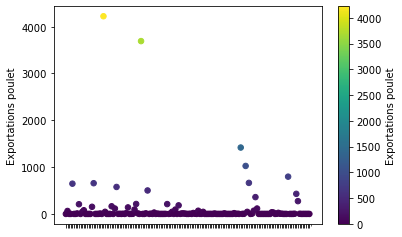

In [28]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Exportations poulet', c = 'Exportations poulet', s=30, cmap = 'viridis');

In [29]:
df_final_expo_ab = df_final.loc[df_final['Exportations poulet'] > 3000 ]
df_final_expo_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
23,Brésil,59.1,207833823.0,1.6,9982.0,4223.0,3.0,14201.0,9982.0,9928.675992,0.02,2.74,6.23,0.92,-0.42,8.41
47,États-Unis d'Amérique,84.0,325084756.0,1.3,18266.0,3692.0,123.0,21914.0,18100.0,59921.674703,0.15,1.78,5.62,2.15,0.34,1.52


In [30]:
df_final_expo_ab2 = df_final.loc[df_final['Exportations poulet'] > 500 ]
df_final_expo_ab2

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
4,Allemagne,79.7,8.265841e+07,1.1,1739.0,646.0,842.0,1514.0,1609.0,44651.829102,1.27,1.10,2.06,0.99,0.59,1.48
17,Belgique,75.0,1.141975e+07,1.2,152.0,656.0,338.0,463.0,144.0,44025.903247,0.87,2.02,1.24,0.47,0.43,1.48
23,Brésil,59.1,2.078338e+08,1.6,9982.0,4223.0,3.0,14201.0,9982.0,9928.675992,0.02,2.74,6.23,0.92,-0.42,8.41
31,"Chine, continentale",78.2,1.421022e+09,1.0,18161.0,576.0,452.0,18236.0,17518.0,8663.126784,0.22,1.43,1.27,0.79,0.00,2.47
47,États-Unis d'Amérique,84.0,3.250848e+08,1.3,18266.0,3692.0,123.0,21914.0,18100.0,59921.674703,0.15,1.78,5.62,2.15,0.34,1.52
51,France,76.8,6.484251e+07,0.6,1573.0,501.0,506.0,1750.0,1485.0,38720.645922,1.46,0.84,2.43,0.93,0.28,1.48
108,Pays-Bas,76.1,1.702135e+07,0.5,372.0,1418.0,608.0,1100.0,346.0,48989.638816,1.01,2.41,2.15,0.74,0.92,1.48
111,Pologne,76.4,3.795318e+07,-0.2,1156.0,1025.0,55.0,2351.0,1150.0,13872.466907,0.39,4.30,3.31,1.34,0.52,1.48
113,Chine - RAS de Hong-Kong,85.3,7.306322e+06,1.7,280.0,663.0,907.0,24.0,391.0,46705.027813,9.40,18.37,6.89,4.41,0.83,0.00
137,Thaïlande,80.1,6.920981e+07,0.7,881.0,796.0,2.0,1676.0,896.0,6593.816870,0.02,1.18,2.33,0.47,-0.75,3.52


### Importations poulet

<AxesSubplot:xlabel='Zone', ylabel='Importations poulet'>

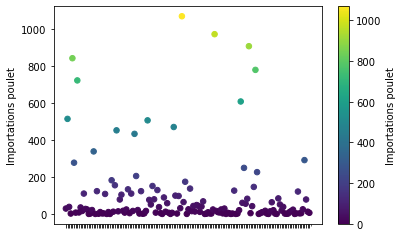

In [31]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Importations poulet', c = 'Importations poulet', s=30, cmap = 'viridis')

### Production poulet

<AxesSubplot:xlabel='Zone', ylabel='Production poulet'>

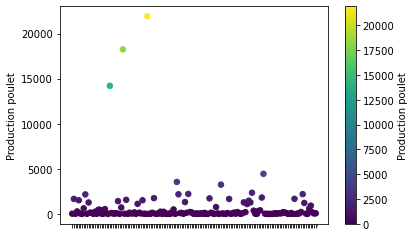

In [32]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Production poulet', c = 'Production poulet', s=30, cmap = 'viridis')

### Consommation poulet

<AxesSubplot:xlabel='Zone', ylabel='Consommation poulet'>

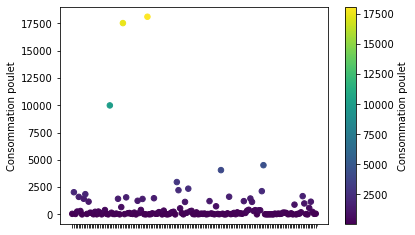

In [33]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Consommation poulet', c = 'Consommation poulet', s=30, cmap = 'viridis')

In [34]:
conso_ab = df_final.loc[df_final['Consommation poulet'] > 7500 ]
conso_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
23,Brésil,59.1,2.078338e+08,1.6,9982.0,4223.0,3.0,14201.0,9982.0,9928.675992,0.02,2.74,6.23,0.92,-0.42,8.41
31,"Chine, continentale",78.2,1.421022e+09,1.0,18161.0,576.0,452.0,18236.0,17518.0,8663.126784,0.22,1.43,1.27,0.79,0.00,2.47
47,États-Unis d'Amérique,84.0,3.250848e+08,1.3,18266.0,3692.0,123.0,21914.0,18100.0,59921.674703,0.15,1.78,5.62,2.15,0.34,1.52


In [35]:
df_final = df_final.loc[df_final['Consommation poulet'] < 7500 ]


<AxesSubplot:xlabel='Zone', ylabel='Consommation poulet'>

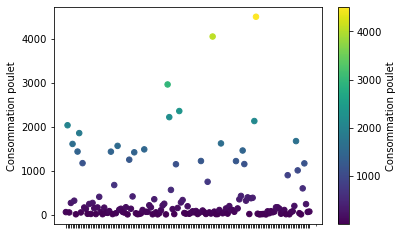

In [36]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Consommation poulet', c = 'Consommation poulet', s=30, cmap = 'viridis')

### Taux_import_poulet %

<AxesSubplot:xlabel='Zone', ylabel='Taux_import_poulet %'>

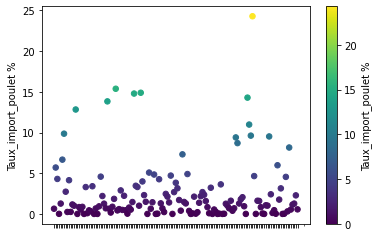

In [37]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Taux_import_poulet %', c = 'Taux_import_poulet %', s=30, cmap = 'viridis')

In [38]:
Taux_import_ab = df_final.loc[df_final['Taux_import_poulet %'] > 20 ]
Taux_import_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
123,Samoa,62.1,195352.0,1.0,15.0,0.0,17.0,0.0,13.0,4223.478963,24.29,0.0,8.18,4.34,1.18,10.38


### Taux_export_poulet %

<AxesSubplot:xlabel='Zone', ylabel='Taux_export_poulet %'>

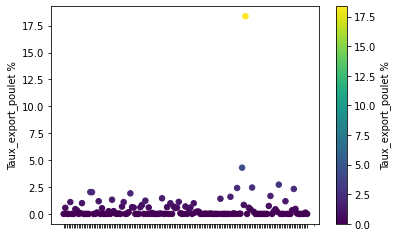

In [39]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Taux_export_poulet %', c = 'Taux_export_poulet %', s=30, cmap = 'viridis')

In [40]:
Taux_export_ab2 = df_final.loc[df_final['Taux_export_poulet %'] > 15 ]
Taux_export_ab2

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
113,Chine - RAS de Hong-Kong,85.3,7306322.0,1.7,280.0,663.0,907.0,24.0,391.0,46705.027813,9.4,18.37,6.89,4.41,0.83,0.0


In [41]:
df_final = df_final.loc[df_final['Taux_export_poulet %'] < 15 ]

### Taux_conso_poulet %

<AxesSubplot:xlabel='Zone', ylabel='Taux_conso_poulet %'>

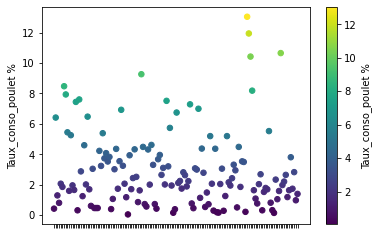

In [42]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Taux_conso_poulet %', c = 'Taux_conso_poulet %', s=30, cmap = 'viridis')

### Taux_dispo_intér_poulet %

<AxesSubplot:xlabel='Zone', ylabel='Taux_dispo_intér_poulet %'>

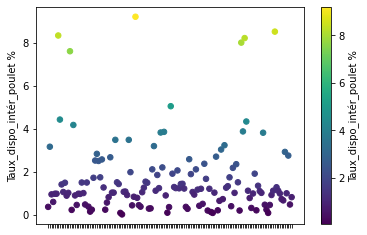

In [43]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Zone', y='Taux_dispo_intér_poulet %', c = 'Taux_dispo_intér_poulet %', s=30, cmap = 'viridis')

## Analyse bi-varié

### Analyse le lien entre la population et facilité de faire des affaires 2020

In [44]:
df_final.head()

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
0,Afghanistan,44.1,36296113.0,5.5,57.0,0.0,29.0,28.0,55.0,520.616409,0.64,0.00,0.42,0.38,-2.80,5.63
1,Afrique du Sud,67.0,57009756.0,2.9,2118.0,63.0,514.0,1667.0,2035.0,6121.876572,5.70,0.57,6.41,3.17,-0.28,4.40
2,Albanie,67.7,2884169.0,-0.2,47.0,0.0,38.0,13.0,47.0,4514.204908,4.30,0.00,1.29,0.96,0.38,1.10
3,Algérie,48.6,41389189.0,4.2,277.0,0.0,2.0,275.0,264.0,4109.696001,0.01,0.00,0.80,0.61,-0.92,10.16
4,Allemagne,79.7,82658409.0,1.1,1739.0,646.0,842.0,1514.0,1609.0,44651.829102,1.27,1.10,2.06,0.99,0.59,1.48


<AxesSubplot:xlabel='Facilité de faire des affaires 2020', ylabel='Population (2017)'>

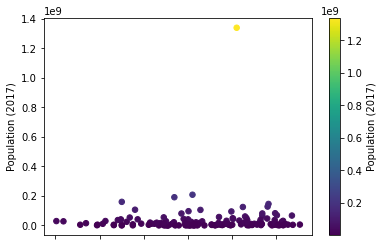

In [45]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Facilité de faire des affaires 2020', y='Population (2017)', c = 'Population (2017)', s=30, cmap = 'viridis')

In [46]:
df_final_ab = df_final.loc[df_final['Population (2017)'] > 1200000000 ]
df_final_ab

,Zone,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
65,Inde,71.0,1.338677e+09,2.2,3661.0,4.0,0.0,3545.0,2965.0,1960.39034,0.0,0.01,0.42,0.31,-0.76,6.19


nous décidons de supprimer le pays la chine et l'inde. parce que les deux pays sont les valeurs abérantes de la population. ils ont beaoucp de monde. Aussi les deux pays n'ont quasiment pas d'importations poulet.
La production poulet à l'Inde est suffit largement pour la consommation.

In [47]:
df_final = df_final.loc[df_final['Population (2017)'] < 1200000000 ]

<AxesSubplot:xlabel='Facilité de faire des affaires 2020', ylabel='PIB (US$)'>

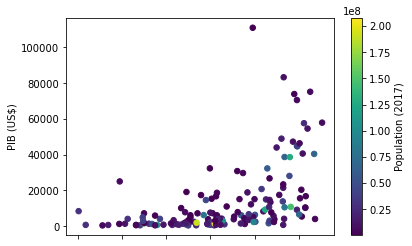

In [53]:
#On affiche un nuage de point 
df_final.plot.scatter(x='Facilité de faire des affaires 2020', y='PIB (US$)', c = 'Population (2017)', s=30, cmap = 'viridis')

<AxesSubplot:xlabel='Facilité de faire des affaires 2020', ylabel='Population (2017)'>

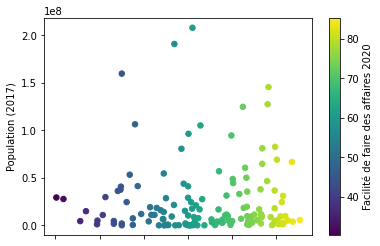

In [50]:
df_final.plot.scatter(x='Facilité de faire des affaires 2020', y='Population (2017)', c = 'Facilité de faire des affaires 2020', s=30, cmap = 'viridis')

### Matrice de corélation entre les variables

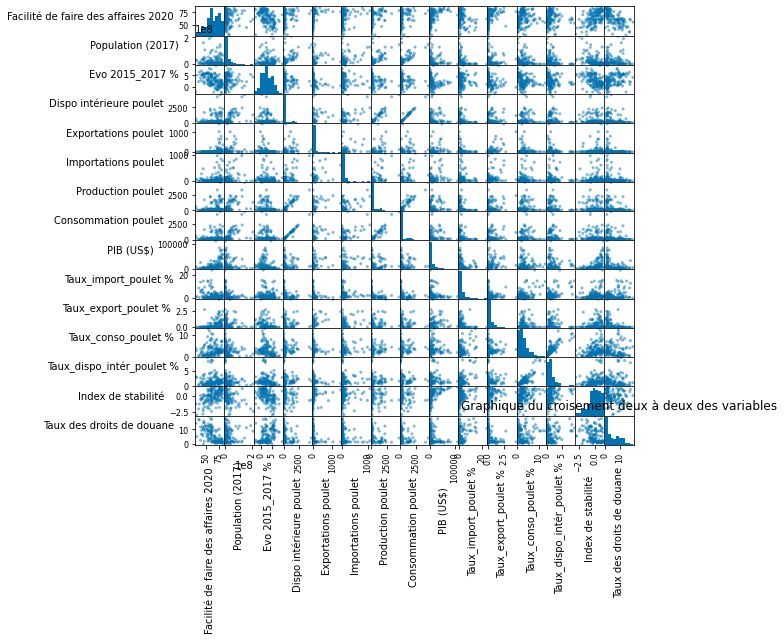

In [49]:
#graphique : croisement deux à deux des variables
axes = pd.plotting.scatter_matrix(df_final,figsize=(9,9))

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.title('Graphique du croisement deux à deux des variables')
plt.show()

In [50]:
df_final.corr()

,Facilité de faire des affaires 2020,Population (2017),Evo 2015_2017 %,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet,PIB (US$),Taux_import_poulet %,Taux_export_poulet %,Taux_conso_poulet %,Taux_dispo_intér_poulet %,Index de stabilité,Taux des droits de douane
Facilité de faire des affaires 2020,1.000000,0.014103,-0.485412,0.262420,0.316291,0.271550,0.300656,0.257862,0.504504,-0.229177,0.415605,0.085892,-0.032400,0.511451,-0.643876
Population (2017),0.014103,1.000000,0.085497,0.652058,0.151097,0.372149,0.634307,0.656824,-0.090803,-0.259197,0.010910,-0.176350,-0.189442,-0.441108,0.017427
Evo 2015_2017 %,-0.485412,0.085497,1.000000,-0.147258,-0.248043,-0.103979,-0.211108,-0.151536,-0.264318,-0.028660,-0.300081,-0.275855,-0.177900,-0.423588,0.404929
Dispo intérieure poulet,0.262420,0.652058,-0.147258,1.000000,0.257163,0.610951,0.961228,0.991487,0.087203,-0.165999,0.173713,0.143695,0.027715,-0.123458,-0.233150
Exportations poulet,0.316291,0.151097,-0.248043,0.257163,1.000000,0.367511,0.435643,0.262289,0.262310,-0.125211,0.671367,-0.025545,-0.100490,0.112567,-0.251998
Importations poulet,0.271550,0.372149,-0.103979,0.610951,0.367511,1.000000,0.503636,0.613810,0.266374,0.000916,0.284415,0.112845,0.077278,0.073531,-0.254282
Production poulet,0.300656,0.634307,-0.211108,0.961228,0.435643,0.503636,1.000000,0.953152,0.101666,-0.208663,0.297159,0.113705,-0.019127,-0.100381,-0.257298
Consommation poulet,0.257862,0.656824,-0.151536,0.991487,0.262289,0.613810,0.953152,1.000000,0.090547,-0.161585,0.183219,0.143882,0.019641,-0.126545,-0.222636
PIB (US$),0.504504,-0.090803,-0.264318,0.087203,0.262310,0.266374,0.101666,0.090547,1.000000,-0.065798,0.267576,0.124916,0.109721,0.555114,-0.372479
Taux_import_poulet %,-0.229177,-0.259197,-0.028660,-0.165999,-0.125211,0.000916,-0.208663,-0.161585,-0.065798,1.000000,-0.100052,0.488436,0.588218,0.231024,0.299024


# Conclusion

In [51]:
df_final.to_csv('df_final.csv', index=False) 